# RICE-VIRT-DATA-PT-05-2022-U-B-MW Module 6

# Code Summary
- **Purpose  :** Collect and analyze weather data across cities worldwide, using 500 or more unique & random cities
- **Created  :** 2022 Jun 14 00:17:02 UTC (Meghan E. Hull)
- **Modified :** 2022 Jun 19 10:41:05 UTC (Meghan E. Hull)

## Dependencies

In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from scipy.stats import linregress

## Inputs & API keys

In [ ]:
# Import the API key.
from config import weather_api_key

# Data Collection

## 1. Generate more than 1,500 random latitudes and longitudes

In [2]:
# Parameters for latitude & longitude ranges
lat_low=-90
lat_high=90
lng_low=-180
lng_high=180
no_gen=1500

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=lat_low, high=lat_high, size=no_gen)
lngs = np.random.uniform(low=lng_low, high=lng_high, size=no_gen)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## 2. List the nearest city to the latitudes and longitudes

In [3]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

597

## 3. Use OpenWeatherMap API to request current weather data from each unique city in cities list

In [8]:
# Creater start of URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
## 4. Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except Exception as e:
#         print(e)
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | nizhniy bestyakh
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | florianopolis
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | kautokeino
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | belogorsk
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of S

Processing Record 36 of Set 4 | batouri
Processing Record 37 of Set 4 | tautira
Processing Record 38 of Set 4 | singleton
Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | hammerfest
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | rudbar
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | rincon
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | carballo
Processing Record 47 of Set 4 | sofiyivka
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | beyneu
Processing Record 50 of Set 4 | hofn
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | makhu
Processing Record 3 of Set 5 | vilcun
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | bastrop
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | green valley
Processing Record 8 of Set 5 | perth
Processing Record 9 of Set 5 | tuatapere
Processing Re

Processing Record 28 of Set 8 | liku
Processing Record 29 of Set 8 | phan rang
City not found. Skipping...
Processing Record 30 of Set 8 | naze
Processing Record 31 of Set 8 | dzaoudzi
Processing Record 32 of Set 8 | miguel hidalgo
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | siyabuswa
Processing Record 35 of Set 8 | lillesand
Processing Record 36 of Set 8 | talakan
Processing Record 37 of Set 8 | north bend
Processing Record 38 of Set 8 | tiznit
Processing Record 39 of Set 8 | chernyshevskiy
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | alpena
Processing Record 42 of Set 8 | penzance
Processing Record 43 of Set 8 | olinda
Processing Record 44 of Set 8 | los llanos de aridane
Processing Record 45 of Set 8 | rimini
Processing Record 46 of Set 8 | sarandi
Processing Record 47 of Set 8 | arkhangelsk
Processing Record 48 of Set 8 | meulaboh
Processing Record 49 of Set 8 | gazanjyk
Processing Record 50 of Set 8 | bangkal
Processing Recor

Processing Record 12 of Set 12 | el badari
City not found. Skipping...
Processing Record 13 of Set 12 | vardo
Processing Record 14 of Set 12 | donskoy
Processing Record 15 of Set 12 | gaya
Processing Record 16 of Set 12 | rundu
Processing Record 17 of Set 12 | goderich
Processing Record 18 of Set 12 | napier
Processing Record 19 of Set 12 | ruteng
Processing Record 20 of Set 12 | guerrero negro
Processing Record 21 of Set 12 | constitucion
Processing Record 22 of Set 12 | thinadhoo
Processing Record 23 of Set 12 | anloga
Processing Record 24 of Set 12 | aksarayskiy
Processing Record 25 of Set 12 | port-cartier
Processing Record 26 of Set 12 | coelho neto
Processing Record 27 of Set 12 | villazon
Processing Record 28 of Set 12 | gilgit
Processing Record 29 of Set 12 | mamakan
Processing Record 30 of Set 12 | santa helena de goias
Processing Record 31 of Set 12 | dinghai
Processing Record 32 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 33 of Set 12 | san mateo del 

## 5. Add data from the JSON file to a DataFrame

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Reorder columns
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

#Check dataframe
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-06-19 03:00:59,-54.8000,-68.3000,20.57,95,96,4.61
1,Haines Junction,CA,2022-06-19 03:01:00,60.7522,-137.5108,61.84,35,94,8.55
2,Nizhniy Bestyakh,RU,2022-06-19 03:01:00,61.9594,129.9086,78.28,41,0,8.95
3,Hermanus,ZA,2022-06-19 03:01:00,-34.4187,19.2345,45.81,74,15,8.43
4,Rikitea,PF,2022-06-19 03:01:01,-23.1203,-134.9692,74.48,68,100,9.95
5,Florianopolis,BR,2022-06-19 02:58:55,-27.6146,-48.5012,53.40,77,75,3.44
6,Port Alfred,ZA,2022-06-19 03:01:01,-33.5906,26.8910,54.18,92,71,1.99
7,Kautokeino,NO,2022-06-19 03:01:02,69.0125,23.0412,43.25,90,100,3.42
8,Margate,GB,2022-06-19 03:01:02,51.3813,1.3862,54.70,91,96,8.99
9,Hilo,US,2022-06-19 03:01:02,19.7297,-155.0900,83.28,87,40,3.00


## Store data in an output csv

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Exploratory Analysis with Visualization

## 1. Create scatter plots of the weather data

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
# Define a function for ploting
# Assumes latitudes data is stored in lats
def plot_weather_lat_scatter(MyData,MyYLabel,MyUnits,MyFileNm):
    # Build the scatter plot for latitude vs. MyData
    plt.figure(figsize=[9, 5])
    plt.scatter(lats,
                MyData,
                edgecolor="black", linewidths=1, marker="o",
                alpha=0.8, label="Cities")
    
    # Incorporate the other graph properties.
    plt.title(f"City Latitude vs. " + MyYLabel + " " + time.strftime("%x"))
    if MyUnits=="":
        plt.ylabel(MyYLabel)
    else:
        plt.ylabel(MyYLabel + " (" + MyUnits + ")")
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure.
    plt.savefig("weather_data/" + MyFileNm + ".png")

    # Show plot.
    return plt
  

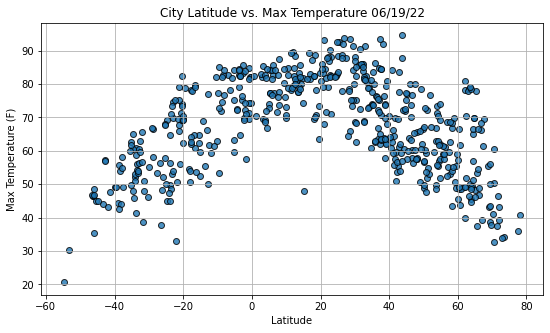

In [30]:
# Call function to plot Max Temperature
plot_weather_lat_scatter(max_temps,"Max Temperature","F","Fig1")
plt.show()

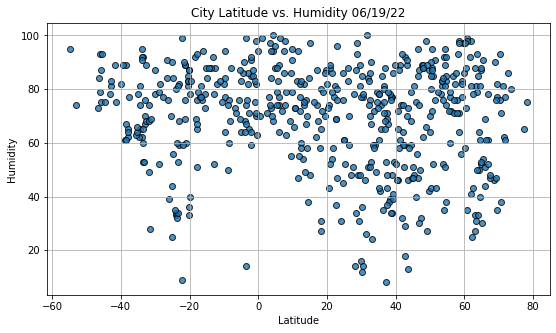

In [31]:
# Call function to plot Humidity
plot_weather_lat_scatter(humidity,"Humidity","","Fig2")
plt.show()

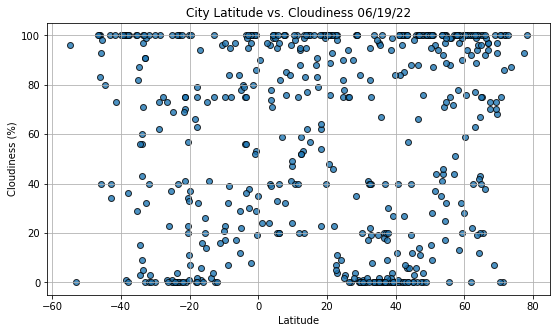

In [32]:
# Call function to plot Cloudiness
plot_weather_lat_scatter(cloudiness,"Cloudiness","%","Fig3")
plt.show()

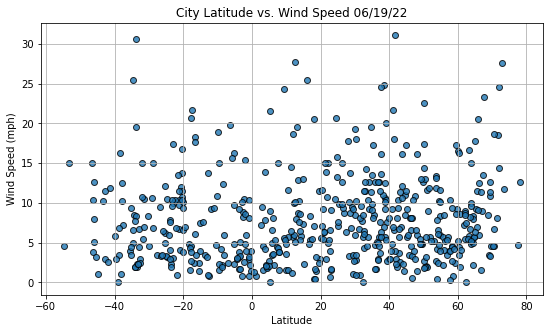

In [33]:
# Call function to plot Wind Speed
plot_weather_lat_scatter(wind_speed,"Wind Speed","mph","Fig4")
plt.show()

## 2. Determine the correlations

In [ ]:
# Define a function for plotting raw data as scatter + a linear regression
def plot_scatter_linregess(x_values,y_values,x_label,y_label,x_units,y_units,text_coordinates,MyFileNm):
    # Run a linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    
    
    # Set figure size
    plt.figure(figsize=[9, 5])

    # Build the scatter plot for x_values vs. y_values
    plt.scatter(x_values,
                y_values,
                edgecolor="black", linewidths=1, marker="o",
                alpha=0.8, label="Cities")
    
    # Add linear regression
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Incorporate the other graph properties.
    plt.title(f"City " + x_label + " vs. " + y_label + " " + time.strftime("%x"))
    if y_units=="":
        plt.ylabel(y_label)
    else:
        plt.ylabel(y_label + " (" + y_units + ")")
    if x_units=="":
        plt.xlabel(x_label)
    else:
        plt.xlabel(x_label + " (" + x_units + ")")
    plt.grid(True)

    # Save the figure.
    plt.savefig("weather_data/" + MyFileNm + ".png")

    # Show plot.
    return plt

In [ ]:
# Call function to plot Max Temperature
plot_scatter_linregess(lats,max_temps,"Latitude","Max Temperature","","F","Fig1")
plt.show()